

# Hypothyroidism Test

## Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. 

### b) Defining the Metric for Success

This project will be success if we will be able draw insights from the given datasets, also we will be able to answer the question required and create a workable model.

### c) Understanding the context

Hypothyrodism is a condition where the body produces little thyroxine. Low thyroxine levels cause problems with development if it occurs when an individual is young. In adults, thyroxine deficiency will lower the metabolic rate, causing weight gain, memory problems, infertility, fatigue, and muscle stiffness.

Thyroxine: is a hormone secreted in the thyroid glands into the bloodstream. It plays a crucial role in heart and digestive function, metabolism, brain development, bone health, and muscle control. It affects almost all of the body's systems, which means proper thyroxine levels are vital for health.

### d) Recording the Experimental Design

The project was undertaken using the following design Datasets(real estate dataset)

Load dataset

Data Cleaning

Performing EDA

Feature Engineering

Decision tree

SVM

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

### e) Data Relevance

The relavance of our data will be answered by the following questions.

Did we get correct insights?

How accurate is the data at predicting the price?

Was the dataset sufficient?

## Reading the Data

In [ ]:
# Import libraries
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image  
import pydotplus
import warnings
warnings.filterwarnings(action = 'ignore')


In [ ]:
# Load dataset
# 
hosy=pd.read_csv('http://bit.ly/hypothyroid_data')
hosy

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


## Checking the Data

In [ ]:
# Determining the no. of records in our dataset in dataset
#
# Dataset has 3163 rows and 26 columns 

hosy.shape

(3163, 26)

In [ ]:
# Previewing the top details of real estate of our dataset
#
hosy.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Previewing the last details of real estate of our dataset
#
hosy.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# Checking whether each column has an appropriate datatype
#
hosy.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## Tidying the Dataset

In [ ]:
# Changing all column names to lower case
#
hosy.columns = hosy.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
hosy.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
hosy.duplicated().sum()

77

In [ ]:
# Removing duplicates
# Keeping every first data point of the duplicated datapoints
#
hosy.drop_duplicates(keep='first', inplace = True)

# Checking to confirm if duplicates were dropped
#
hosy.duplicated().any()

False

In [ ]:
# Replacing the '?' character in the dataframe with NAN
#
hosy.replace('?', np.nan, inplace=True)
hosy.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [ ]:
# Identify if there Missing Data
#
hosy.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

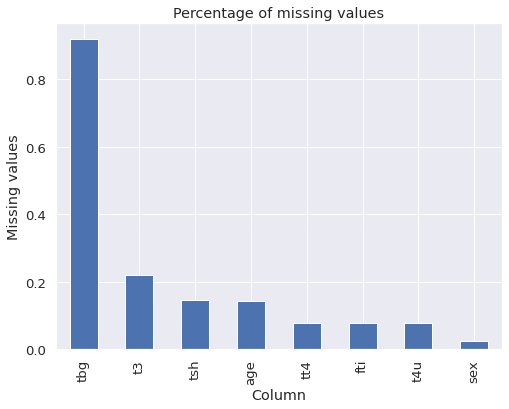

In [ ]:
# Visualising missing values
#
hosy.isna().mean().round(3).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6))
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

From the above results we will drop tbg column because it has more than 90% of null values lets confirm with visualization

In [ ]:
# drop tbg and tbg_measured column
hosy.drop(['tbg','tbg_measured'],axis=1,inplace=True)
hosy.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti'],
      dtype='object')

In [ ]:
# Lists of numerical, categorical
# Numerical columns list
#
numerical = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

# Filling missing values in the sex column with mode
#
hosy.sex.fillna(hosy.sex.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
# A for loop has been used for efficiency
#
for column in numerical:
    if column in numerical:
      hosy[column] = hosy[column].astype('float')
      hosy[column].fillna(hosy[column].mean(), inplace = True)
    else:
      print('No nan Values')
    

# Checking whether the missing values have been filled 
#
hosy.isnull().sum()



status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
dtype: int64

In [ ]:
# Outliers



In [ ]:
df=hosy

In [ ]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0


## EDA Analysis

In [ ]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0


#### Univariate Analysis

In [ ]:
# age mean
df['age'].mean()

51.11253776435048

In [ ]:
# age mode
df['age'].mode()

0    51.112538
dtype: float64

In [ ]:
# age median
df['age'].median()

51.112537764350456

In [ ]:
# age variance
df['age'].var()

318.78070137640805

In [ ]:
# age skew
# negative skewed means left skewness
df['age'].skew()

-0.18327889150126656

In [133]:
# age kurtosis 
# it is Platykurtic, Tails of such distributions thinner. 
df['age'].kurt()

-0.6214515094605133

In [ ]:
# discribe data to get mean, mode,min,max
df.describe()


,age,tsh,t3,tt4,t4u,fti
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


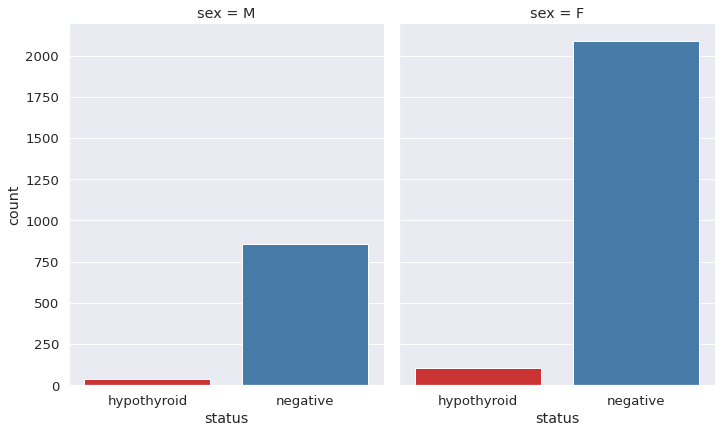

In [ ]:
# Plotting bar charts
#
sns.catplot("status", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

We can conclude that the dataset has more female than male. more female are affected by hypothyroid.

In [ ]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0


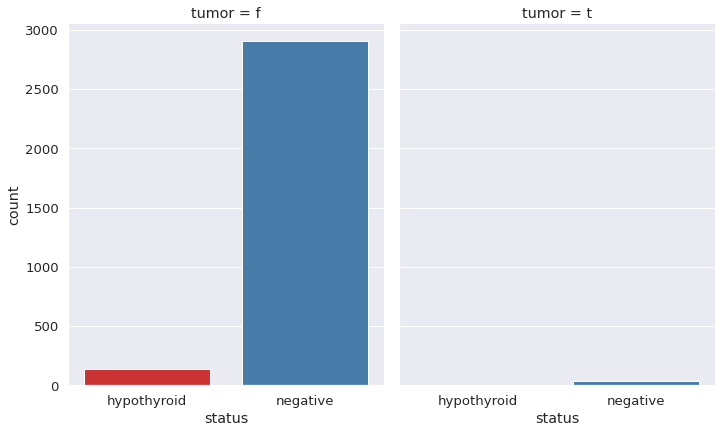

In [ ]:
# Plotting bar charts
#
sns.catplot("status", col="tumor", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

From the above bar chart we can tell that most of the houses has 3 bedrooms the 4 bedrooms the list is 9 bedrooms

#### Bivariate Analysis

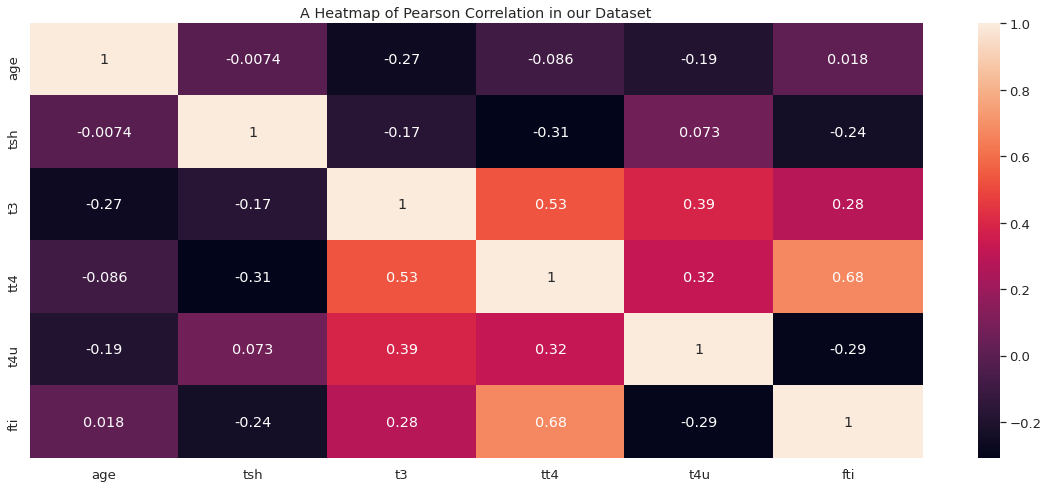

In [ ]:
# Plot heatmap
# 
a = df.corr() 
plt.figure(figsize = (20,8))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset')
plt.show()
plt.show()

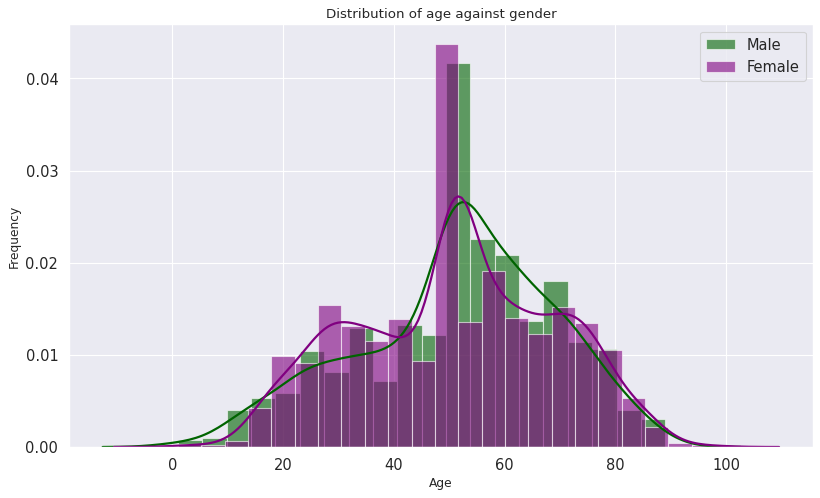

In [ ]:
# Distribution of age against gender
# Plotting histogram to show distribution of age per gender
# 

# Selecting only male datapoints in the age column
male = df.loc[df.sex=='M', 'age']  
# Selecting only female datapoints in the age column
female = df.loc[df.sex=='F', 'age']  

# Creating a dictionary containing opacaticy and line width
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="purple", label="Female", **kwargs)
plt.title('Distribution of age against gender', fontsize = 12)
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.legend()

The above chart shows that both median and mode are greater that mean because it is skewed to the left

<Figure size 480x320 with 0 Axes>

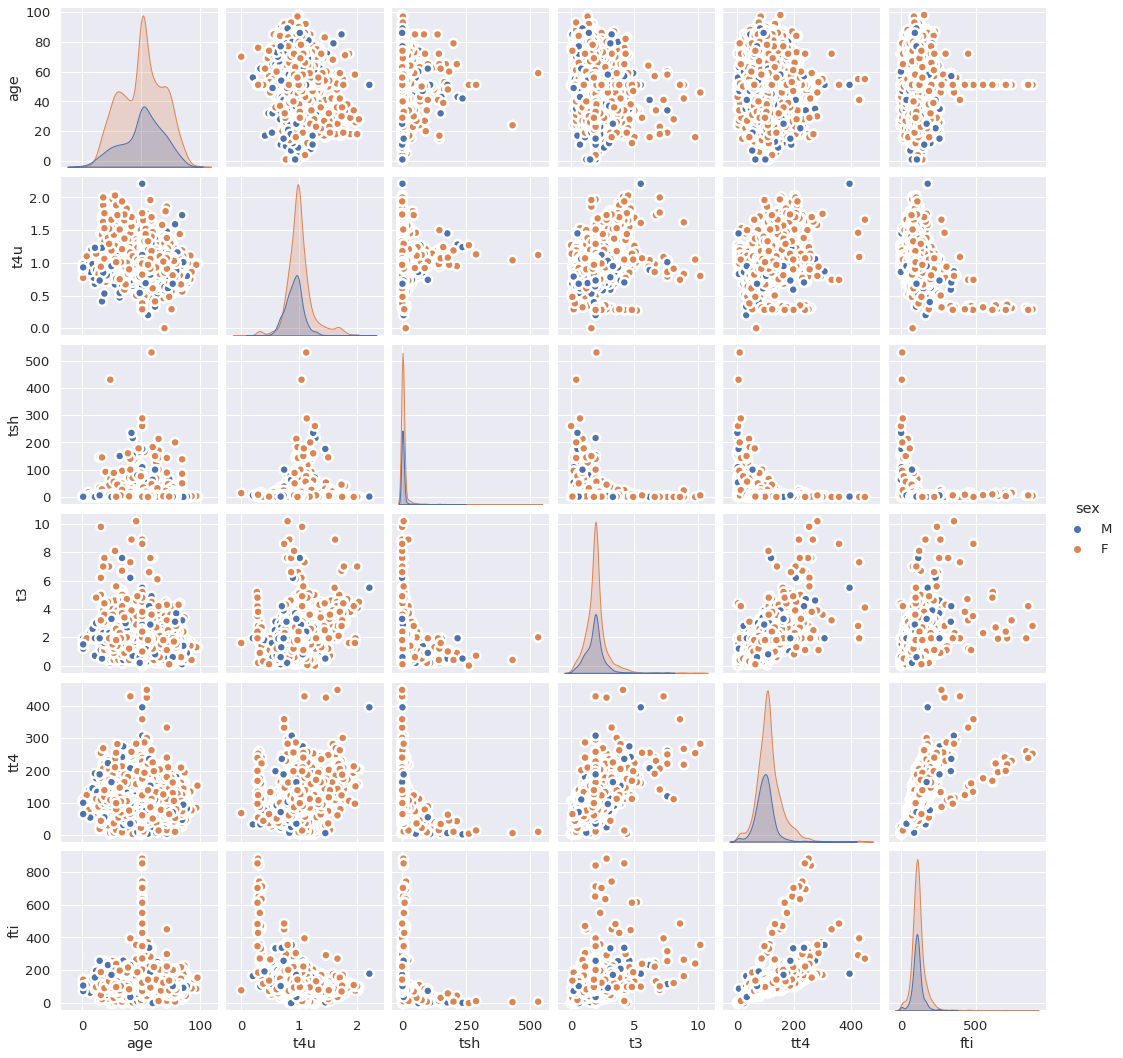

In [ ]:
# Pairplot for all the numerical values
plt.figure(dpi= 80)
sns.pairplot(df[['age','sex','t4u','tsh', 't3', 'tt4', 'fti']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

From the above chart it shows that tsh,t3,tt4 and fti are right skewness meaning there mode and median are less that mean.

#### Multivariate Analysis

**PCA**

In [ ]:
df_pca=df
#  Preprocessing
# 
X = df_pca.drop(['status'], axis=1)
y = df_pca['status']

In [ ]:
# Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Normalization
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Applying PCA
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explained Variance Ratio
# 
explained_variance = pca.explained_variance_ratio_

explained_variance

array([3.35071876e-01, 1.88468265e-01, 1.26030626e-01, 8.69519020e-02,
       7.27396941e-02, 6.46347500e-02, 5.51881288e-02, 3.67486243e-02,
       2.57253350e-02, 8.06282414e-03, 3.77975809e-04, 1.36544379e-32,
       9.21028892e-34, 6.53350560e-34, 2.99379223e-34, 2.01775737e-34,
       1.76642611e-34, 7.04642282e-35, 1.56308366e-35, 1.30299471e-36,
       3.83917939e-39, 1.16849673e-66, 3.67760804e-67])

In [ ]:
# Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#  Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 

# resulting in 0.948634891254049% accuracy.

[[  0  39]
 [  0 887]]
Accuracy 0.9578833693304536


Accuracy of the model is 95.8%

## Implementing the Solution

### Feature Engineering

In [ ]:
# Categorical columns list
category = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',\
            't4u_measured', 'fti_measured', 'tbg_measured']

# Boolean columns list
bool_columns = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
# Using a for loop to change columns to their appriopriate datatypes
#
for column in df.columns:
  if column in category:
    df[column] = df[column].astype('category')
  elif column in bool_columns:
    df[column] = df[column].astype('bool')

In [ ]:
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
dtype: object

In [ ]:
df_forest=df
categorical_cols = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                                   'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick',
                                   'tumor','lithium','goitre','tsh_measured','t3_measured','tt4_measured',
                                   't4u_measured','fti_measured'] 

from sklearn.preprocessing import LabelEncoder,StandardScaler
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df_forest[categorical_cols] = df_forest[categorical_cols].apply(lambda col: le.fit_transform(col))  


In [ ]:
df_forest

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,hypothyroid,15.0,0,0,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,hypothyroid,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0
3159,negative,29.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0
3160,negative,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0
3161,negative,74.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0


### Modelling

#### Random Forests Classifier

In [ ]:
#displaying the dataset
df_forest.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
count,3086.000000,3086.000000,3086.0,3086.0,3086.0,3086.0,3086.0,3086.0,3086.0,3086.0,3086.0,3086.0,3086.0,3086.000000,3086.000000,3086.00000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,0.289695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.852560,5.809320,0.77965,1.933666,0.922229,108.706922,0.922553,0.977559,0.922878,115.489080
std,17.854431,0.453694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354602,22.180994,0.41455,0.864826,0.267854,42.836471,0.267342,0.216873,0.266829,57.780967
min,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.00000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000
50%,51.112538,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.00000,1.933666,1.000000,107.000000,1.000000,0.977559,1.000000,110.000000
75%,64.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.809320,1.00000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000
max,98.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,530.000000,1.00000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000


**Random Forest with all features**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,accuracy_score

# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest.drop('status', axis = 1)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Model Instantiation
forest = RandomForestClassifier(random_state = 0)
forest = forest.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))


print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# confusion_matrix(y_test, y_pred)

Train MSE is: 0.0
Train R2 Score is: 1.0
Test MSE is: 0.09294788246803462
Test R2 Score is: 0.7858526291446246
The accuracy score is: 0.9913606911447084


The model is 99% accurate but the model can't explain 22% of the hidden data

*- Will try and improve this by using only important features*

In [ ]:
# Check confusion matrix
# it can predict 885 and 33 models but can't predict 6 and 2 models
confusion_matrix(y_test, y_pred_test)

array([[885,   2],
       [  6,  33]])

In [ ]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_test.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.042117,0.037797
std,0.200964,0.190808
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


**Important Features**

In [ ]:

# Checking for the most important features that contribute most in predicting the target
#
df_important = pd.DataFrame({'feature': X.columns, 'importance': np.round(forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
df_important

,importance
feature,
fti,0.3365
tsh,0.2521
tt4,0.2120
t3,0.0796
t4u,0.0559
age,0.0465
sex,0.0076
tsh_measured,0.0059
t3_measured,0.0030


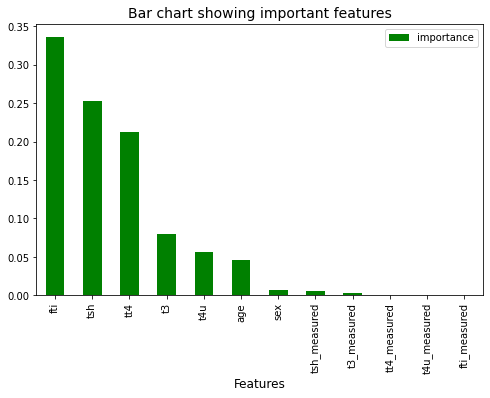

In [ ]:
# Creating a bar chart of feature importance in descending order
#
df_impor = df_important[:12].sort_values(by = 'importance', ascending = False)
df_impor.plot(kind = 'bar', figsize = (8, 5), color = 'green')
plt.legend(loc = 'top right')
plt.title('Bar chart showing important features', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

The most important feature is fti and others followed

**Model 2 with important features**

In [ ]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh','tt4','t3','t4u','age','sex','tsh_measured']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Model Instantiation
forest = RandomForestClassifier(random_state = 0)
forest = forest.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

# MSE and R2 score for train
print('Train MSE',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 884 and 35 models but can't predict 4 and 3 models
confusion_matrix(y_test, y_pred_test)

Train MSE 0.0
Train R2 Score 1.0
Test MSE 0.08694478275537947
Test R2 Score 0.8126210505015465
The accuracy score is: 0.9924406047516199


array([[884,   3],
       [  4,  35]])

After using important features the model improves its performance where MSE error reduce from 0.09294788246803462 to 0.08694478275537947 also it also improve the process of explaining hidden data, where now it can't explain 19% an improvement from 22%.

*- Will try and improve the model by using Hyperparameter Tuning* 

**Parameter Tuning**

In [ ]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'r2', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print('The best parameters are:',search.best_params_)

The best parameters are: {'max_depth': 5, 'n_estimators': 30}


In [ ]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh','tt4','t3','t4u','age','sex','tsh_measured']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Model Instantiation
forest = RandomForestClassifier(n_estimators=50,max_depth=5,random_state = 0)
forest = forest.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))


# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 885 and 33 models but can't predict 6 and 2 models
confusion_matrix(y_test, y_pred_test)

# Check confusion matrix
# it can predict 885 and 32 models but can't predict 7 and 2 models
confusion_matrix(y_test, y_pred_test)

Train MSE is: 0.09622504486493763
Train R2 Score is: 0.7942033956439718
Test MSE is: 0.09858611698511624
Test R2 Score is: 0.7590842077877027
The accuracy score is: 0.990280777537797


array([[885,   2],
       [  7,  32]])

The model has improve in terms of explaining hidden data, because its not able  explaining  4% of hidden values 

**Lets visualising the 5ft tree of RandomForestClassifier**

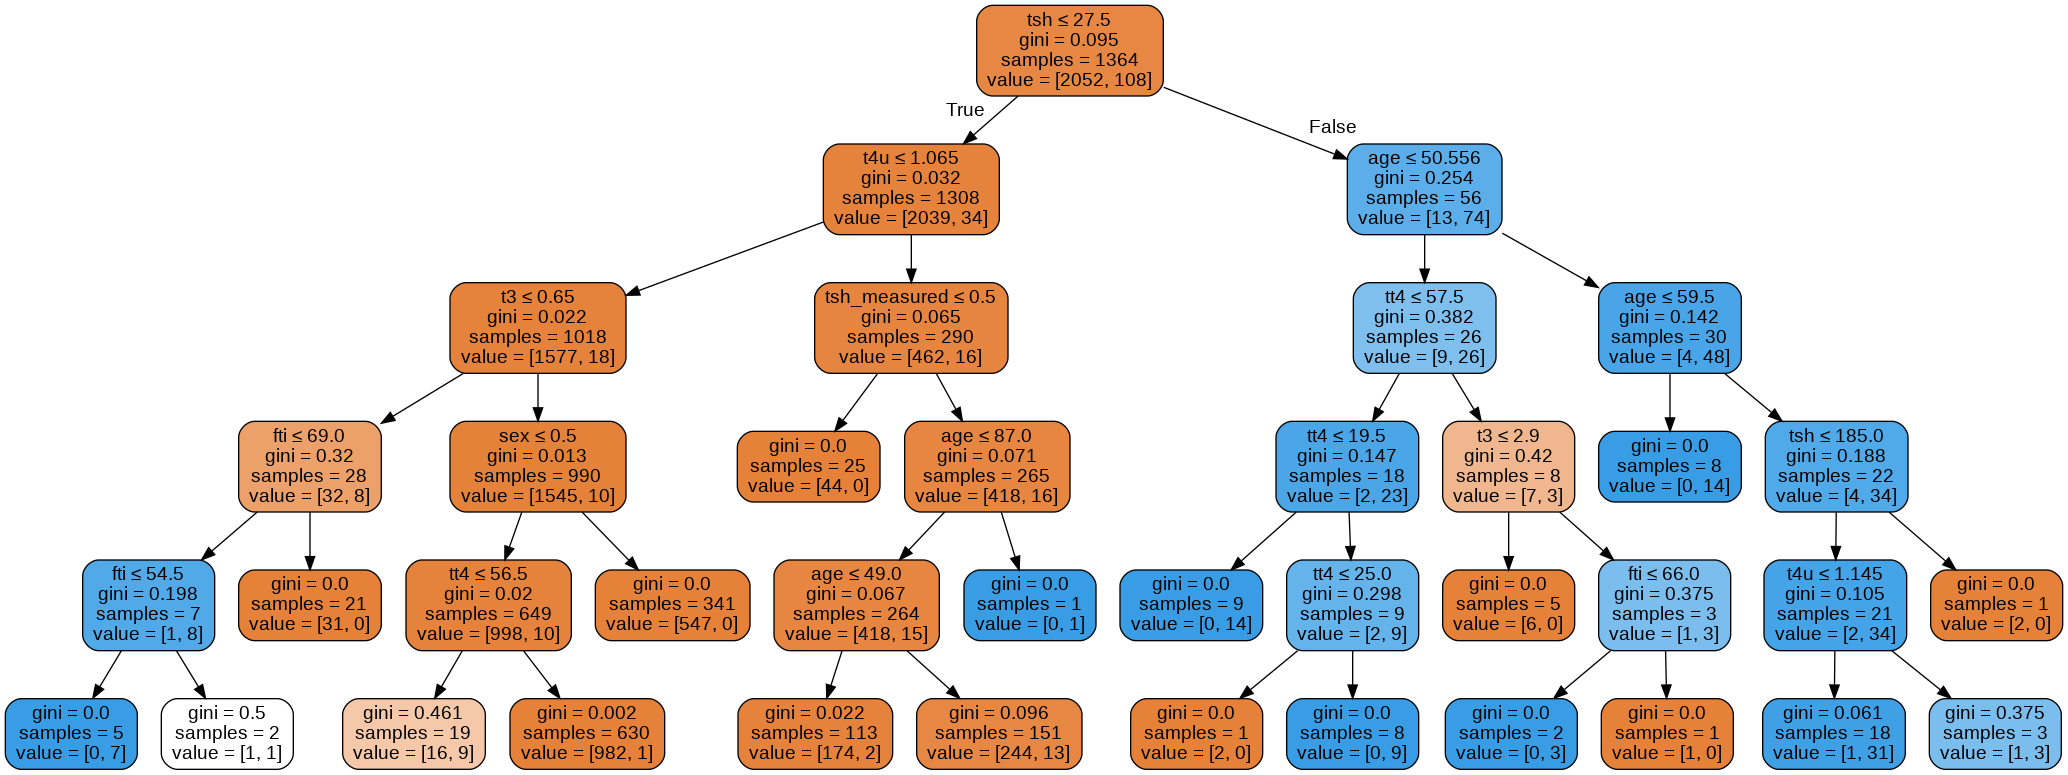

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from xgboost import XGBClassifier
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest which is 5th tree
tree = forest.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroidism_forest.png')
Image(graph.create_png())

**Ada Boost Classifier**

In [ ]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest.drop('status', axis = 1)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Model Instantiation
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred_test = ada.predict(X_test)
y_pred_train = ada.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 889 and 29 models but can't predict 10 and 4 models
confusion_matrix(y_test, y_pred_test)

Train MSE is: 0.06085806194501846
Train R2 Score is: 0.9176813582575887
Test MSE is: 0.12295849095024003
Test R2 Score is: 0.6252421010030932
The accuracy score is: 0.9848812095032398


array([[883,   4],
       [ 10,  29]])

The mode has an accuracy of 98.5% but can't explain 29% of hidden data will improve this by using only important features.

**Important Features**

In [ ]:
# Checking for the most important features that contribute most in predicting the target
#
df_important = pd.DataFrame({'feature': X.columns, 'importance': np.round(ada.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
df_important.reset_index()

,feature,importance
0,tsh,0.26
1,fti,0.20
2,t4u,0.16
3,t3,0.14
4,tt4,0.12
5,age,0.12
6,query_hypothyroid,0.00
7,t3_measured,0.00
8,fti_measured,0.00
9,on_thyroxine,0.00


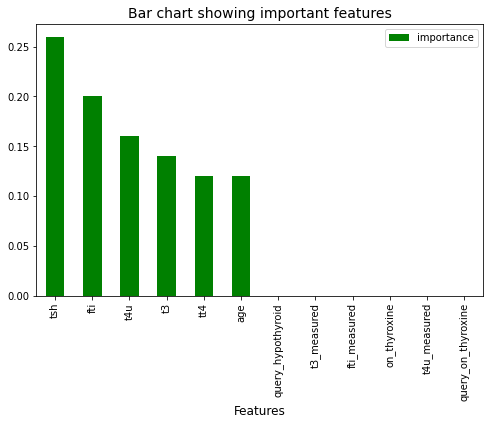

In [ ]:
# Creating a bar chart of feature importance in descending order
#
df_impor = df_important[:12].sort_values(by = 'importance', ascending = False)
df_impor.plot(kind = 'bar', figsize = (8, 5), color = 'green')
plt.legend(loc = 'top right')
plt.title('Bar chart showing important features', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

From the above graph we can see it only six features are important

**Model 2 with important features**

In [ ]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh','tt4','t3','t4u','age']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Model Instantiation
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred_test = ada.predict(X_test)
y_pred_train = ada.predict(X_train)

# MSE and R2 score for train
print('Train MSE',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 885 and 29 models but can't predict 10 and 4 models
confusion_matrix(y_test, y_pred_test)

# Check confusion matrix
# it can predict 883 and 39 models but can't predict 10 and 4 models
confusion_matrix(y_test, y_pred_test)

Train MSE 0.06085806194501846
Train R2 Score 0.9176813582575887
Test MSE 0.12295849095024003
Test R2 Score 0.6252421010030932
The accuracy score is: 0.9848812095032398


array([[883,   4],
       [ 10,  29]])

From this the was no improvement to the model we will use parameter tuning to improve

**Parameter Tuning**

In [ ]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print('The best parameters are:',search.best_params_)

The best parameters are: {'learning_rate': 1, 'n_estimators': 30}


In [ ]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh','tt4','t3','t4u','age']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Model Instantiation
ada = AdaBoostClassifier(n_estimators=10, learning_rate=1, random_state = 0)
ada.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred_test = ada.predict(X_test)
y_pred_train = ada.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 886 and 37 models but can't predict 2 and 1 models
confusion_matrix(y_test, y_pred_test)

Train MSE is: 0.09622504486493763
Train R2 Score is: 0.7942033956439718
Test MSE is: 0.056918721179716796
Test R2 Score is: 0.9196947359292342
The accuracy score is: 0.9967602591792657


array([[886,   1],
       [  2,  37]])

The model as improve from 98.5% to 99.7%, also it as improve on explaning the hidden. it can predict 886 and 37 models but can't predict 2 and 1 models

**Visualization for the 5th tree Ada Boost**

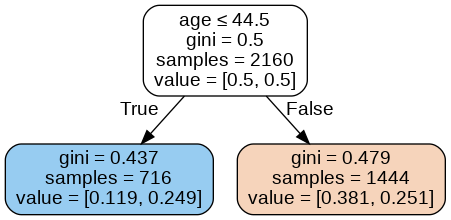

In [ ]:
dot_data = StringIO()
# pick a specific tree from the forest which is 5th tree
tree = ada.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroidism_add.png')
Image(graph.create_png())

Between Random forest and Ada boost. Ada boost became the best algorithm because its accuracy is 99%. Unlike Random forest where it seem there was overfitting where test r2 score was greater than train r2 score, but for ada boost could not explain 4% of hidden data which is well. 

Ada boost was able to pedict 885 and 32 models only 7and 2 model were not able predicted


#### Support Vector Machine

***Linear function***

In [134]:
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the model
model = SVC(kernel= 'linear')
ln_model = model.fit(X_train,y_train)

# Predict based on the model we've trained
y_pred_test = ln_model.predict(X_test)
y_pred_train = ln_model.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 884 and 29 models but can't predict 10 and 3 models
confusion_matrix(y_test, y_pred_test)


Train MSE is: 0.13944333775567927
Train R2 Score is: 0.5678271308523408
Test MSE is: 0.1184857666129093
Test R2 Score is: 0.652010522360015
The accuracy score is: 0.9859611231101512


array([[884,   3],
       [ 10,  29]])

**Polynomial function**

In [135]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the model
model = SVC(kernel= 'poly')
poly_model = model.fit(X_train,y_train)

# Predict based on the model we've trained
y_pred_test = poly_model.predict(X_test)
y_pred_train = poly_model.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 886 and 25 models but can't predict 14 and 1 models
confusion_matrix(y_test, y_pred_test)


Train MSE is: 0.13088021099321942
Train R2 Score is: 0.6192762819413479
Test MSE is: 0.12727412975020377
Test R2 Score is: 0.5984736796461713
The accuracy score is: 0.9838012958963283


array([[886,   1],
       [ 14,  25]])

**Rbf kernel function**

In [136]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the model
model = SVC(kernel= 'rbf')
rbf_model = model.fit(X_train,y_train)

# Predict based on the model we've trained
y_pred_test = rbf_model.predict(X_test)
y_pred_train = rbf_model.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 885 and 27 models but can't predict 12 and 2 models
confusion_matrix(y_test, y_pred_test)

Train MSE is: 0.12546210878484682
Train R2 Score is: 0.6501457725947521
Test MSE is: 0.12295849095024003
Test R2 Score is: 0.6252421010030932
The accuracy score is: 0.9848812095032398


array([[885,   2],
       [ 12,  27]])

The best model of all is Rbf model with 98.6% accuracy. Also with a minimum MSE error of 0.1184857666129093 compared to the others

**Visualization of both models**

ValueError: ignored

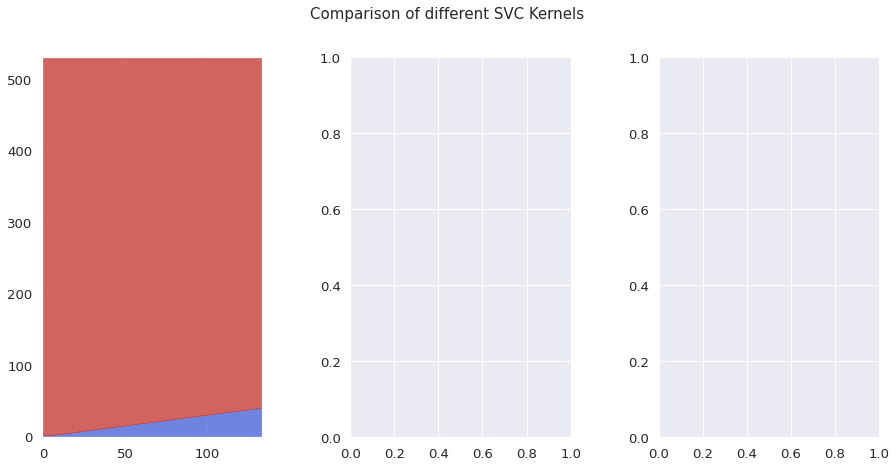

In [ ]:
models = [poly_model, ln_model, rbf_model]
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 1x3 grid for plotting.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Comparison of different SVC Kernels', fontsize = 15)

# title for the plots
titles = ('Polynomial kernel', 'Linear kernel', ' RBF kernel')

# Randomly selecting 300 datapoints to plot
X = df_forest[['fti', 'tsh']].iloc[:150, :].values
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, axes.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('fti')
    ax.set_ylabel('tsh')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

**Hyperparameter tuning**

In [137]:
# Creating a dictionary of parameters to tune
#
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds to 10 and instantiat to the model
# 
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'r2', cv = kfold, random_state = 0)

# Selecting the independent variables and the target variable
#
X = df_forest[['fti', 'tsh']]
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')


The best parameters are: {'gamma': 17.791666666666668, 'C': 81}


In [138]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the model
model = SVC(kernel='linear',C = 81, gamma = 17.791666666666668)
ln_model = model.fit(X_train,y_train)

# Predict based on the model we've trained
y_pred_test = ln_model.predict(X_test)
y_pred_train = ln_model.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 883 and 30 models but can't predict 9 and 4 models
confusion_matrix(y_test, y_pred_test)


Train MSE is: 0.13437096247164249
Train R2 Score is: 0.598696621505745
Test MSE is: 0.1184857666129093
Test R2 Score is: 0.652010522360015
The accuracy score is: 0.9859611231101512


array([[883,   4],
       [  9,  30]])

The model accuracy is 98.6% and the MSE error is 0.1184857666129093 predicted models are 883 and 30 models that cant be predict is 9 and 4

**Additional one feature to the final Kernel (Linear Kernel)**

In [139]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh','t4u']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the model
model = SVC(kernel='linear',C = 81, gamma = 17.791666666666668)
ln_model = model.fit(X_train,y_train)

# Predict based on the model we've trained
y_pred_test = ln_model.predict(X_test)
y_pred_train = ln_model.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 883 and 30 models but can't predict 9 and 4 models
confusion_matrix(y_test, y_pred_test)

Train MSE is: 0.13608276348795434
Train R2 Score is: 0.5884067912879436
Test MSE is: 0.1184857666129093
Test R2 Score is: 0.652010522360015
The accuracy score is: 0.9859611231101512


array([[883,   4],
       [  9,  30]])

After additional of one features the accuracy still remains the same as that of previous model with two features

### Challenging the Question

In [ ]:
# Split the independent and dependent variables
y = np.where(df_forest.status == 'hypothyroid', 1, 0)

X = df_forest[['fti','tsh']]

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the model
model = SVC(kernel='sigmoid',C = 81, gamma = 17.791666666666668)
ln_model = model.fit(X_train,y_train)

# Predict based on the model we've trained
y_pred_test = ln_model.predict(X_test)
y_pred_train = ln_model.predict(X_train)

# MSE and R2 score for train
print('Train MSE is:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score is:',r2_score(y_train, y_pred_train))

# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print('Test R2 Score is:',r2_score(y_test, y_pred_test))

# Checking for the accuracy of our model
print('The accuracy score is:',accuracy_score(y_test, y_pred_test))

# Check confusion matrix
# it can predict 883 and 30 models but can't predict 9 and 4 models
confusion_matrix(y_test, y_pred_test)

Train MSE is: 0.26614532371118854
Train R2 Score is: -0.5743440233236154
Test MSE is: 0.2649422285126402
Test R2 Score is: -0.7399473881999246
The accuracy score is: 0.9298056155507559


array([[850,  37],
       [ 28,  11]])

From the above results sigmoid kernel did qualify to challeng the Linear kernel because its accuracy is lower and has bigger error than that of linear kernel

## Follow up questions

a). Did we have the right data?


We had the right data since we were able to get some insights from it. it also helps in doing a predictive model of deferent algorithms models which gave good accuracy

b). Do we need other data to answer our question?

We needed other data to help in reducing MSE error

c). Did we have the right question?

Yes, Questions were correct since we were able to answer them.

## Conclusion

Out of all the model Ada Boosting is the best model with an accuracy of 99%

On the other hand out of all the three kernel Linear kernel fuction was the best kernel with an accuracy of 98.6%